Weather Forecasting Model

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading Dataset**

In [13]:
df = pd.read_csv("/Users/shadabmalik/Downloads/Weather-data.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


**Size of the Dataset**

In [15]:
df.shape

(8784, 8)

In [17]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [19]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [21]:
df.info

<bound method DataFrame.info of              Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0        1/1/2012 0:00    -1.8              -3.9         86                4   
1        1/1/2012 1:00    -1.8              -3.7         87                4   
2        1/1/2012 2:00    -1.8              -3.4         89                7   
3        1/1/2012 3:00    -1.5              -3.2         88                6   
4        1/1/2012 4:00    -1.5              -3.3         88                7   
...                ...     ...               ...        ...              ...   
8779  12/31/2012 19:00     0.1              -2.7         81               30   
8780  12/31/2012 20:00     0.2              -2.4         83               24   
8781  12/31/2012 21:00    -0.5              -1.5         93               28   
8782  12/31/2012 22:00    -0.2              -1.8         89               28   
8783  12/31/2012 23:00     0.0              -2.1         86               30   

      V

**Type of Weather**

In [23]:
df.Weather.value_counts()

Weather
Mainly Clear                               2106
Mostly Cloudy                              2069
Cloudy                                     1728
Clear                                      1326
Snow                                        390
Rain                                        306
Rain Showers                                188
Fog                                         150
Rain,Fog                                    116
Drizzle,Fog                                  80
Snow Showers                                 60
Drizzle                                      41
Snow,Fog                                     37
Snow,Blowing Snow                            19
Rain,Snow                                    18
Thunderstorms,Rain Showers                   16
Haze                                         16
Drizzle,Snow,Fog                             15
Freezing Rain                                14
Freezing Drizzle,Snow                        11
Freezing Drizzle                

In [25]:
df.Weather.unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [27]:
df.Weather.nunique()

50

**Converting the weather category into a standard category**

In [29]:
x = 'Thunderstorms,Moderate Rain Showers,Fog'

In [31]:
list_of_lists = [w.split() for w in x.split(',')]
list_of_lists

[['Thunderstorms'], ['Moderate', 'Rain', 'Showers'], ['Fog']]

In [33]:
from itertools import chain
flat_list = list(chain(*list_of_lists))
flat_list

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [35]:
def create_list(x):
    list_of_lists = [w.split() for w in x.split(',')]
    flat_list = list(chain(*list_of_lists))
    return flat_list

def Get_weather(list1):
    if 'Fog' in list1 and 'Rain' in list1:
        return 'RAIN+FOG'
    elif 'Snow' in list1 and 'Rain' in list1:
        return 'SNOW+RAIN'
    elif 'Snow' in list1:
        return 'SNOW'
    elif 'Rain' in list1:
        return 'RAIN'
    elif 'Fog' in list1:
        return 'FOG'
    elif 'Clear' in list1:
        return 'Clear'
    elif 'Cloudy' in list1:
        return 'Cloudy'
    else:
        return 'RAIN'

In [37]:
create_list(x)

['Thunderstorms', 'Moderate', 'Rain', 'Showers', 'Fog']

In [39]:
Get_weather(create_list(x))

'RAIN+FOG'

In [41]:
df['Std_Weather'] = df['Weather'].apply(lambda x : Get_weather(create_list(x)))

In [43]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,FOG
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,FOG
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",FOG
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",FOG
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,FOG


In [45]:
df.Std_Weather.value_counts()

Std_Weather
Cloudy       3797
Clear        3432
RAIN          603
SNOW          556
FOG           241
RAIN+FOG      129
SNOW+RAIN      26
Name: count, dtype: int64

Sample Selection & Data Balancing

In [47]:
Cloudy_df = df[df['Std_Weather'] == 'Cloudy']
Cloudy_df_Sample = Cloudy_df.sample(600)
Cloudy_df_Sample.shape

(600, 9)

In [49]:
Clear_df = df[df['Std_Weather'] == 'Clear']
Clear_df_Sample = Clear_df.sample(600)
Clear_df_Sample.shape

(600, 9)

In [51]:
RAIN_df_Sample = df[df['Std_Weather'] == 'RAIN']
SNOW_df_Sample = df[df['Std_Weather'] == 'SNOW']

In [53]:
RAIN_df_Sample.shape

(603, 9)

In [55]:
SNOW_df_Sample.shape

(556, 9)

**Create new Weather dataset**

In [57]:
weather_df = pd.concat([Cloudy_df_Sample, Clear_df_Sample, RAIN_df_Sample, SNOW_df_Sample], axis = 0)

In [59]:
weather_df.shape

(2359, 9)

In [61]:
weather_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Std_Weather
1374,2/27/2012 6:00,-9.0,-15.2,61,17,25.0,102.42,Mostly Cloudy,Cloudy
6801,10/10/2012 9:00,12.5,8.9,79,32,24.1,100.64,Cloudy,Cloudy
5746,8/27/2012 10:00,26.0,17.9,61,22,48.3,101.25,Mostly Cloudy,Cloudy
5561,8/19/2012 17:00,23.7,10.6,44,13,48.3,100.73,Mostly Cloudy,Cloudy
1653,3/9/2012 21:00,-1.9,-8.6,60,6,25.0,101.63,Mostly Cloudy,Cloudy


In [63]:
weather_df.Std_Weather.value_counts()

Std_Weather
RAIN      603
Cloudy    600
Clear     600
SNOW      556
Name: count, dtype: int64

Drop Columns: Date & Weather

In [65]:
weather_df.drop(columns = ['Weather','Date/Time'], axis = 1, inplace = True)

In [67]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1374,-9.0,-15.2,61,17,25.0,102.42,Cloudy
6801,12.5,8.9,79,32,24.1,100.64,Cloudy
5746,26.0,17.9,61,22,48.3,101.25,Cloudy
5561,23.7,10.6,44,13,48.3,100.73,Cloudy
1653,-1.9,-8.6,60,6,25.0,101.63,Cloudy


**Duplicate Values**

In [69]:
weather_df[weather_df.duplicated()]

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather


Null/Missing Values

In [71]:
weather_df.isnull().sum()

Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Std_Weather         0
dtype: int64

In [73]:
weather_df.dtypes

Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Std_Weather          object
dtype: object

In [75]:
weather_df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000,2359.000000
mean,6.684866,1.597202,72.321747,16.562526,23.198601,100.806710
std,11.176051,10.309993,16.022260,9.387261,12.737043,0.921245
min,-22.200000,-27.800000,18.000000,0.000000,0.600000,97.520000
25%,-2.500000,-6.600000,62.000000,9.000000,16.100000,100.300000
50%,5.600000,0.600000,76.000000,15.000000,24.100000,100.820000
75%,16.150000,10.400000,85.000000,22.000000,25.000000,101.420000
max,32.900000,23.100000,99.000000,57.000000,48.300000,103.630000


**Correlation among the features**

In [77]:
cols = ['Temp_C',	'Dew Point Temp_C',	'Rel Hum_%',	'Wind Speed_km/h',	'Visibility_km',	'Press_kPa']

In [79]:
corr_matrix = weather_df[cols].corr()

In [81]:
corr_matrix

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Temp_C,1.000000,0.937872,-0.256755,-0.148142,0.396396,-0.076316
Dew Point Temp_C,0.937872,1.000000,0.087457,-0.140190,0.181810,-0.191851
Rel Hum_%,-0.256755,0.087457,1.000000,0.043112,-0.658914,-0.339180
Wind Speed_km/h,-0.148142,-0.140190,0.043112,1.000000,-0.150691,-0.393535
Visibility_km,0.396396,0.181810,-0.658914,-0.150691,1.000000,0.330003
Press_kPa,-0.076316,-0.191851,-0.339180,-0.393535,0.330003,1.000000


**Data Visualization using Heat map**

<Axes: >

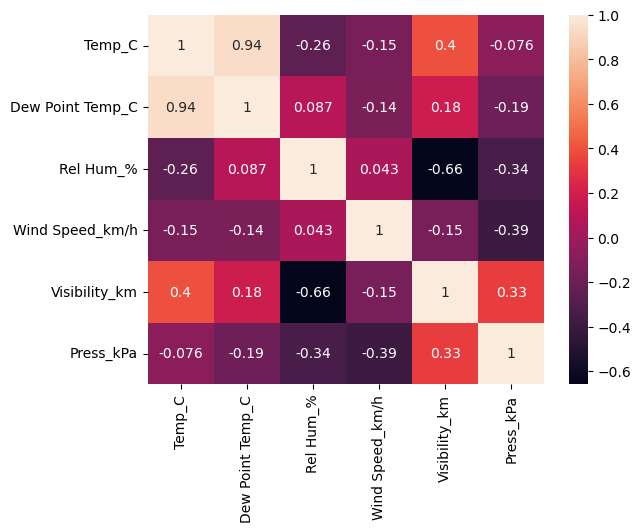

In [83]:
sns.heatmap(corr_matrix, annot = True)

In [85]:
weather_df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa', 'Std_Weather'],
      dtype='object')

<Axes: ylabel='Frequency'>

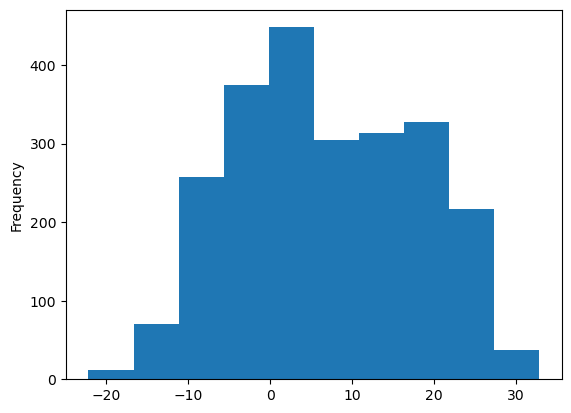

In [87]:
weather_df['Temp_C'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

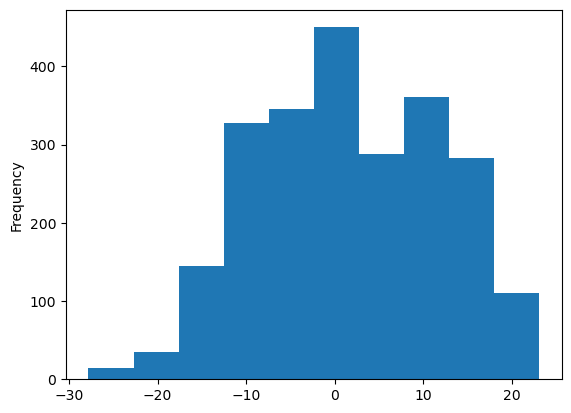

In [89]:
weather_df['Dew Point Temp_C'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

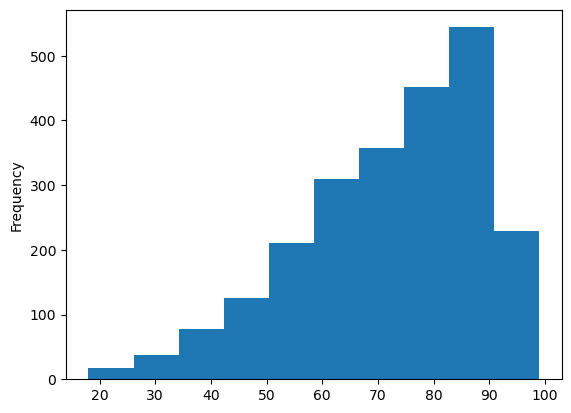

In [91]:
weather_df['Rel Hum_%'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

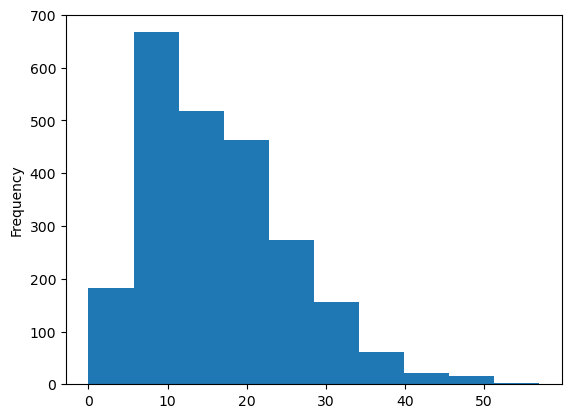

In [93]:
weather_df['Wind Speed_km/h'].plot(kind = 'hist')

<Axes: ylabel='Frequency'>

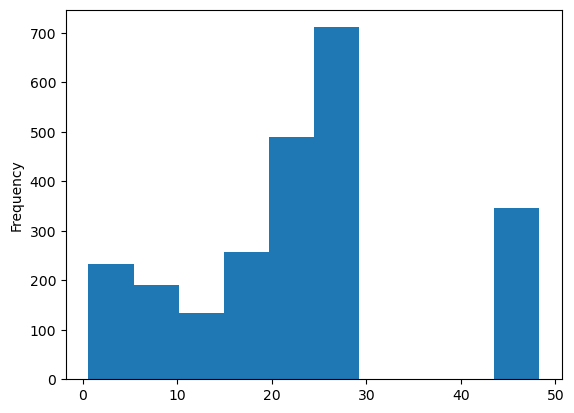

In [95]:
weather_df['Visibility_km'].plot(kind = 'hist')

<Axes: >

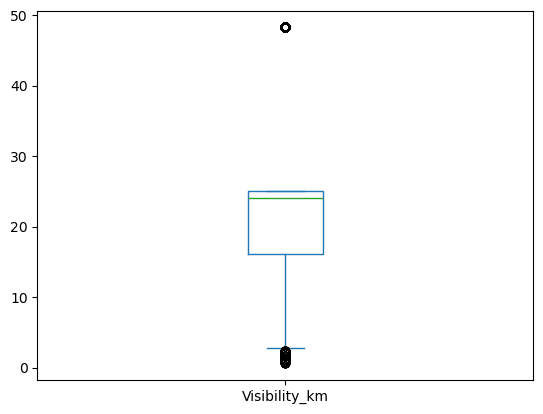

In [97]:
weather_df['Visibility_km'].plot(kind = 'box')

<Axes: >

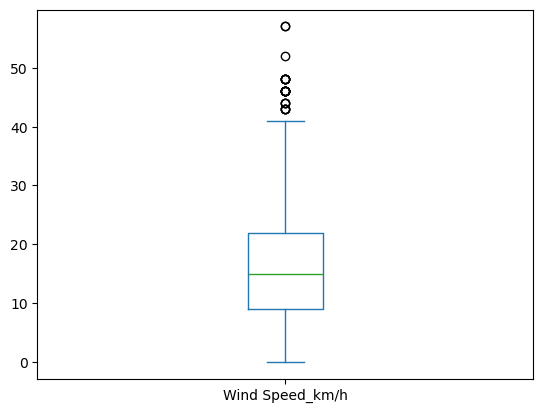

In [99]:
weather_df['Wind Speed_km/h'].plot(kind = 'box')

<Axes: ylabel='Frequency'>

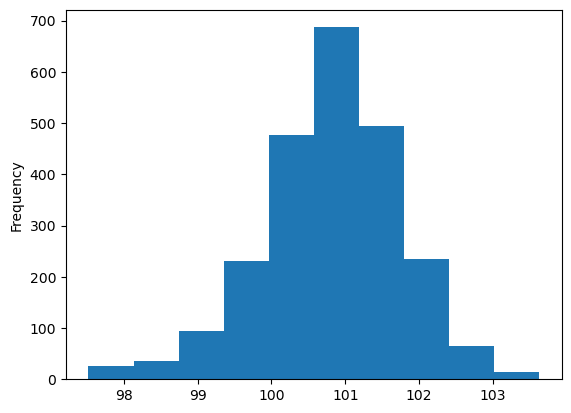

In [101]:
weather_df['Press_kPa'].plot(kind = 'hist')

In [103]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1374,-9.0,-15.2,61,17,25.0,102.42,Cloudy
6801,12.5,8.9,79,32,24.1,100.64,Cloudy
5746,26.0,17.9,61,22,48.3,101.25,Cloudy
5561,23.7,10.6,44,13,48.3,100.73,Cloudy
1653,-1.9,-8.6,60,6,25.0,101.63,Cloudy


**Label Encoding: Converting target variable (Std_Weather) into numeric**

In [105]:
from sklearn.preprocessing import LabelEncoder

In [107]:
label_Encoder = LabelEncoder()

In [109]:
weather_df['Std_Weather'] = label_Encoder.fit_transform(weather_df['Std_Weather'])

In [111]:
label_Encoder.classes_

array(['Clear', 'Cloudy', 'RAIN', 'SNOW'], dtype=object)

In [113]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1374,-9.0,-15.2,61,17,25.0,102.42,1
6801,12.5,8.9,79,32,24.1,100.64,1
5746,26.0,17.9,61,22,48.3,101.25,1
5561,23.7,10.6,44,13,48.3,100.73,1
1653,-1.9,-8.6,60,6,25.0,101.63,1


In [115]:
weather_df['Std_Weather'].value_counts()

Std_Weather
2    603
1    600
0    600
3    556
Name: count, dtype: int64

X,Y Variables

In [118]:
X = weather_df.drop(['Std_Weather'], axis = 1)

In [120]:
X

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
1374,-9.0,-15.2,61,17,25.0,102.42
6801,12.5,8.9,79,32,24.1,100.64
5746,26.0,17.9,61,22,48.3,101.25
5561,23.7,10.6,44,13,48.3,100.73
1653,-1.9,-8.6,60,6,25.0,101.63
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


In [122]:
Y = weather_df['Std_Weather']

In [124]:
Y

1374    1
6801    1
5746    1
5561    1
1653    1
       ..
8779    3
8780    3
8781    3
8782    3
8783    3
Name: Std_Weather, Length: 2359, dtype: int64

**Feature Scaling**

In [127]:
from sklearn.preprocessing import StandardScaler

In [129]:
Std_Scaler = StandardScaler()

In [131]:
X_Std = Std_Scaler.fit_transform(X)

In [133]:
X_Std

array([[-1.40373307, -1.62956118, -0.7067759 ,  0.04661277,  0.1414599 ,
         1.75157663],
       [ 0.52043129,  0.7084725 ,  0.41689934,  1.64486179,  0.07078488,
        -0.18100047],
       [ 1.72862752,  1.5815971 , -0.7067759 ,  0.57936245,  1.97115778,
         0.48128719],
       ...,
       [-0.64301693, -0.3004715 ,  1.29086896,  1.21866206, -1.44480178,
        -0.93014553],
       [-0.61616813, -0.32957565,  1.04116336,  1.21866206, -1.06001553,
        -0.97357423],
       [-0.59826892, -0.3586798 ,  0.85388415,  1.43176192, -0.93437104,
        -0.99528858]])

**Splitting Data into training & Testing**

In [136]:
from sklearn.model_selection import train_test_split

In [138]:
x_train, x_test, y_train, y_test = train_test_split(X_Std, Y, test_size = 0.2, random_state = 42, stratify = Y)

In [140]:
x_train.shape, x_test.shape

((1887, 6), (472, 6))

**Decision Tree**

In [143]:
from sklearn.tree import DecisionTreeClassifier

In [145]:
decision_tree_classifier = DecisionTreeClassifier()

**Decision  Tree training**

In [148]:
decision_tree_classifier.fit(x_train, y_train)

DecisionTreeClassifier()

**Decision Tree Model Predictions**

In [151]:
y_pred_dt = decision_tree_classifier.predict(x_test)

**Model Accuracy**

In [154]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [156]:
accuracy_score(y_test, y_pred_dt)

0.6292372881355932

In [158]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.64      0.66      0.65       120
           1       0.48      0.49      0.49       120
           2       0.67      0.61      0.64       121
           3       0.74      0.77      0.75       111

    accuracy                           0.63       472
   macro avg       0.63      0.63      0.63       472
weighted avg       0.63      0.63      0.63       472



**Confusion Matrix**

<Axes: >

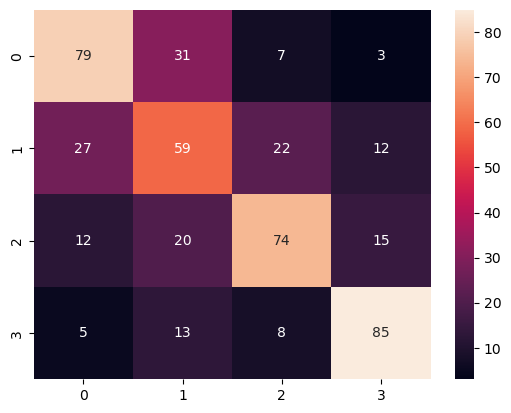

In [161]:
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot = True, fmt = 'd')

Building Best Models

In [164]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [166]:
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
SVC_model = SVC()
KNN_model = KNeighborsClassifier()
lr_model = LogisticRegression()
NB_model = GaussianNB()
AB_model = AdaBoostClassifier()
GB_model = GradientBoostingClassifier()
ET_model = ExtraTreesClassifier()

In [169]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
model_list = [dt_model, rf_model, SVC_model, KNN_model, lr_model, NB_model, AB_model, GB_model, ET_model]
ModelName = []  #Accuracy List
acc_list = []  #Model Name list
for model in model_list:
    model_name = model.__class__.__name__
    acc = cross_val_score(model, X_Std, Y, scoring = 'accuracy', cv = 5)
    acc_list.append(acc.mean()*100)
    ModelName.append(model_name)
    

In [170]:
acc_list

[54.17872179639426,
 60.57981575443521,
 60.53744287307927,
 55.45026809169096,
 60.32575839360897,
 59.05178307963583,
 51.50491201554572,
 61.1297635755155,
 62.571611069128075]

In [173]:
model_df = pd.DataFrame({'Model' : model_list, 'Cross_val_Accuracy': acc_list})

In [175]:
model_df

,Model,Cross_val_Accuracy
0,DecisionTreeClassifier(),54.178722
1,RandomForestClassifier(),60.579816
2,SVC(),60.537443
3,KNeighborsClassifier(),55.450268
4,LogisticRegression(),60.325758
5,GaussianNB(),59.051783
6,AdaBoostClassifier(),51.504912
7,GradientBoostingClassifier(),61.129764
8,ExtraTreesClassifier(),62.571611


K-Fold Cross Validation

In [178]:
model_df.sort_values(by = ['Cross_val_Accuracy'], ascending = False)

,Model,Cross_val_Accuracy
8,ExtraTreesClassifier(),62.571611
7,GradientBoostingClassifier(),61.129764
1,RandomForestClassifier(),60.579816
2,SVC(),60.537443
4,LogisticRegression(),60.325758
5,GaussianNB(),59.051783
3,KNeighborsClassifier(),55.450268
0,DecisionTreeClassifier(),54.178722
6,AdaBoostClassifier(),51.504912


**Model Evaluation**

In [181]:
rf_model.fit(x_train, y_train)
y_pred_RF = rf_model.predict(x_test)
print(classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.62      0.64      0.63       120
           1       0.48      0.45      0.46       120
           2       0.72      0.71      0.72       121
           3       0.81      0.85      0.83       111

    accuracy                           0.66       472
   macro avg       0.66      0.66      0.66       472
weighted avg       0.66      0.66      0.66       472



**Confusion Matrix for RF model**

<Axes: >

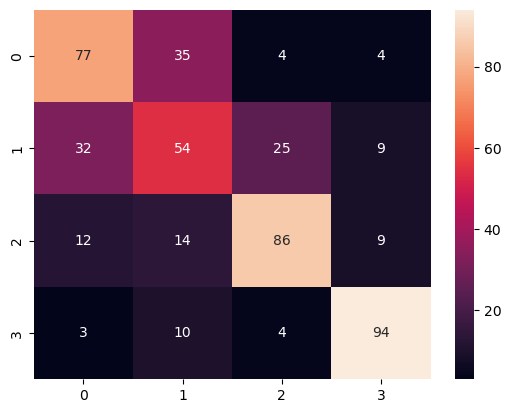

In [184]:
cnfm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cnfm, annot = True)

**Hyperparameter Tuning**

In [187]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [189]:
parameters = {
    'n_estimators' : [50,100],
    'max_features' : ['sqrt', 'log2'],
    'criterion' : ['gini', 'entropy']
}

In [191]:
grid_search = GridSearchCV(estimator = rf_model, param_grid = parameters)

In [193]:
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100]})

**Best Hyperparameters**

In [196]:
grid_search.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 100}

In [198]:
rf_model_new = RandomForestClassifier( criterion = 'entropy', max_features = 'sqrt', n_estimators = 50 )

In [200]:
rf_model_new.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50)

In [202]:
y_pred_rf = rf_model_new.predict(x_test)

In [204]:
accuracy_score(y_test, y_pred_rf)

0.652542372881356

In [206]:
weather_df.head()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Std_Weather
1374,-9.0,-15.2,61,17,25.0,102.42,1
6801,12.5,8.9,79,32,24.1,100.64,1
5746,26.0,17.9,61,22,48.3,101.25,1
5561,23.7,10.6,44,13,48.3,100.73,1
1653,-1.9,-8.6,60,6,25.0,101.63,1


# Taking inputs for weather prediction

In [211]:
temp = float(input("Enter Temperature = "))
dpt = float(input("Enter Dew Point = "))
hum = float(input("Enter Humidity = "))
wind = float(input("Enter Wind Speed in Km/hr = "))
vis = float(input("Enter Visibility in Km = "))
pressure = float(input("Enter Pressure in KPa = "))


Enter Temperature =  23
Enter Dew Point =  -10
Enter Humidity =  46
Enter Wind Speed in Km/hr =  43
Enter Visibility in Km =  24
Enter Pressure in KPa =  102


In [217]:
input_data = [temp, dpt, hum, wind, vis, pressure]
scaled_data = Std_Scaler.transform([input_data])
prediction = rf_model_new.predict(scaled_data)

print("")
print("")
print("Weather prediction model is as follows")
print("")

if prediction[0]== 0:
    print("Weather is Clear")
elif prediction[0] == 1:
    print("Weather is Cloudy")
elif prediction[0] == 2:
    print("Weather is Rainy")
else:
    print("Weather is Snowy")



Weather prediction model is as follows

Weather is Cloudy
